In [90]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
#mpl.use('pdf')
import sys
sys.path.append("../")
import copy
from Plotting.generate_database import ResultsDatabaseGenerator
from common_packages.utilities import get_equivalent_classical_layer_size, get_num_parameters_per_quantum_layer
from Plotting.Plot import BasicPlot, MultiPlot
import pandas as pd
import seaborn as sns
colors =   ["#5dd448",
            "#bfa900",
            "#ec742f",
            "#e9496f",
            "#b04ca4",]
palette = sns.color_palette('pastel', n_colors=15)
palette.pop(8) # unreadable yellow colour
colors = palette.as_hex()

sns.set_style('ticks')

#colors = ["#332288", "#88CCEE", "#44AA99", "#117733", "#999933", "#DDCC77", "#CC6677", "#882255", "#AA4499"]
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=colors)
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams["font.family"] = "sans serif"
plt.rcParams["font.size"] = 10
plt.rcParams["axes.linewidth"] = 0.5

import tensorflow as tf
tf.compat.v1.enable_eager_execution()

from quantum_kerr import Net
from data import generate_synthetic_dataset_easy


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [91]:
model = Net(quantum_preparation_layer=True, max_initial_weight=0.2109)
train_data, test_data = generate_synthetic_dataset_easy(num_datapoints=1000, n_features=8, n_classes=4)

x = train_data[0][0:2]
print(x.shape)
model(x)
print(model.quantum_layer.traces)

(2, 8)
ListWrapper([0.9998956918716431, 0.9999887347221375])


In [92]:
kerr_cutoff_path = './Experiment_cutoff_hybrid_with_trace_kerr2/'

def generate_database(ex_path):
    dbGen = ResultsDatabaseGenerator()
    dbGen.initialize_from_folder(ex_path)
    data = dbGen.data
    config = data[1]['config']
    config.pop('__doc__', None)
    #config.pop('iteration', None)
    df = pd.DataFrame(columns=config.keys())
    df['iteration'] = np.nan
    # df['epoch'] = np.nan
    # df['acc'] = np.nan
    # df['val_acc'] = np.nan
    # df['loss'] = np.nan
    # df['val_loss'] = np.nan
    # df['traces_average'] = np.nan
    # df['trace_sum'] = np.nan
    # df['traces_std'] = np.nan
    for key in data[1]['metrics'].keys():
        df[key] = np.nan
    #df['trace_sum'] = np.nan
    for i in data.keys():
        config = data[i]['config']
        config.pop('__doc__', None)
        try:
            config['iteration']
        except KeyError:
            config['iteration'] = 1
        if config['iteration'] != -1:
            metrics = data[i]['metrics']
            temp_dict = {}
            for key in metrics.keys():
                temp_dict[key] = metrics[key]
            for key in config.keys():
                temp_dict[key] = config[key]
            df.loc[i] = temp_dict
            # print(metrics.keys())
            # acc, epoch, loss, trace_sum, traces_average, traces_std, traces_sum, val_acc, val_loss = metrics.values()
            # if acc[-1] > 0.0:
            #     acc = np.array(acc)
            #     loss = np.array(loss)
            #     val_acc = np.array(val_acc)
            #     val_loss = np.array(val_loss)
            #     df.loc[i] = [*config.values(), epoch, acc, val_acc, loss, val_loss, traces_average, traces_sum, traces_std]
    return df

df = generate_database(kerr_cutoff_path)
#df.drop(columns=['trace_sum'], inplace=True)
display(df.head())
display(df.describe())

,iteration,quantum_preparation_layer,regularizer_string,scale_max,accuracy,epoch,loss,traces_average,traces_std,val_accuracy,val_loss
4,0,False,None,6,"[0.40142858028411865, 0.46857142448425293, 0.4...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1.362321376800537, 1.3166296482086182, 1.2482...","[0.2333944687768817, 0.26453948522359133, 0.35...","[0.11505603506437596, 0.15036238405504207, 0.1...","[0.47333332896232605, 0.4933333396911621, 0.46...","[1.3389195203781128, 1.2767845392227173, 1.205..."
7,0,True,None,1,"[0.23999999463558197, 0.3285714387893677, 0.52...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1.3669487237930298, 1.3344449996948242, 1.294...","[0.9995614913105965, 0.9992650760412216, 0.997...","[0.0001446039686281295, 0.0003093708428229942,...","[0.30000001192092896, 0.5, 0.5600000023841858,...","[1.3384722471237183, 1.3039065599441528, 1.254..."
9,0,False,L1=0.1,1,"[0.2800000011920929, 0.3328571319580078, 0.467...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1.4396765232086182, 1.3508007526397705, 1.290...","[0.6977387196719647, 0.6805496424436569, 0.799...","[0.11842901282141496, 0.10932912575960119, 0.0...","[0.28999999165534973, 0.43666666746139526, 0.4...","[1.3798354864120483, 1.3141454458236694, 1.263..."
5,0,True,L1=0.1,1,"[0.20714285969734192, 0.33714285492897034, 0.5...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1.415027141571045, 1.3563416004180908, 1.3038...","[0.9996660425662994, 0.9997381356358528, 0.999...","[8.723621605623137e-05, 5.417653306052065e-05,...","[0.27666667103767395, 0.5233333110809326, 0.56...","[1.3699092864990234, 1.3170613050460815, 1.261..."
11,0,True,L2=0.15,1,"[0.238571435213089, 0.3571428656578064, 0.5128...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1.37948739528656, 1.339163899421692, 1.298837...","[0.9996593133211136, 0.9996857589483261, 0.999...","[9.108865380286077e-05, 6.743262385072755e-05,...","[0.2966666519641876, 0.5366666913032532, 0.566...","[1.3452166318893433, 1.3079301118850708, 1.261..."


,iteration,scale_max
count,11.0,11.000000
mean,0.0,2.363636
std,0.0,2.693426
min,0.0,1.000000
25%,0.0,1.000000
50%,0.0,1.000000
75%,0.0,2.000000
max,0.0,9.000000


In [93]:
reg_strings = df['regularizer_string'].unique()
scale_max = df['scale_max'].unique()
quantum_preperation = df['quantum_preparation_layer'].unique()


cols = ['accuracy', 'val_accuracy', 'loss', 'val_loss', 'traces_average', 'traces_std', 'epoch']

df_exp = df.explode(column=cols)
df_exp[cols] = df_exp[cols].apply(pd.to_numeric, errors='coerce')
df_exp.reset_index(inplace=True)
df_exp.pop('index')
display(df_exp.head())



,iteration,quantum_preparation_layer,regularizer_string,scale_max,accuracy,epoch,loss,traces_average,traces_std,val_accuracy,val_loss
0,0,False,None,6,0.401429,0,1.362321,0.233394,0.115056,0.473333,1.338920
1,0,False,None,6,0.468571,1,1.316630,0.264539,0.150362,0.493333,1.276785
2,0,False,None,6,0.452857,2,1.248296,0.350467,0.184083,0.460000,1.205328
3,0,False,None,6,0.471429,3,1.183217,0.445155,0.199409,0.466667,1.149869
4,0,False,None,6,0.478571,4,1.120830,0.503122,0.204516,0.496667,1.078640


/tmp/ipykernel_24012/1411138791.py:4: UserWarning: The palette list has more values (14) than needed (2), which may not be intended.
/tmp/ipykernel_24012/1411138791.py:10: UserWarning: The palette list has more values (12) than needed (4), which may not be intended.
/tmp/ipykernel_24012/1411138791.py:18: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
/tmp/ipykernel_24012/1411138791.py:27: UserWarning: The palette list has more values (14) than needed (2), which may not be intended.
/tmp/ipykernel_24012/1411138791.py:33: UserWarning: The palette list has more values (12) than needed (4), which may not be intended.
/tmp/ipykernel_24012/1411138791.py:40: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.


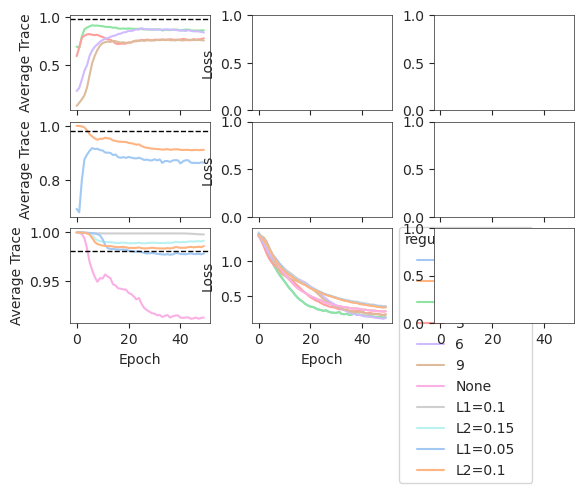

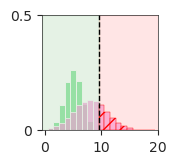

In [161]:
fig, axs = plt.subplots(3, 3, figsize=(6.5, 4), sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.3})
palette_temp = palette
ax = axs[:,0]
sns.lineplot(x='epoch', y='traces_average', hue='quantum_preparation_layer', palette=palette_temp,
            data=df_exp[(df_exp['scale_max']==1) & (df_exp['regularizer_string']=='None')], ax=ax[1], legend=None)
ax[1].set_ylabel('Average Trace')
ax[1].axhline(y=0.98, linestyle='--', color='black', linewidth=1.0)
palette_temp = palette[len(quantum_preperation):]

sns.lineplot(x='epoch', y='traces_average', hue='scale_max', palette=palette_temp,
            data=df_exp[(df_exp['quantum_preparation_layer']==False) & (df_exp['regularizer_string']=='None')], 
            hue_order=[1,3,6,9], ax=ax[0], legend=None)
ax[0].axhline(y=0.98, linestyle='--', color='black', linewidth=1.0)
ax[0].set_ylabel('Average Trace')

palette_temp = palette[len(quantum_preperation)+len(scale_max):]

sns.lineplot(x='epoch', y='traces_average', hue='regularizer_string', markers=False, palette=palette_temp,
            data=df_exp[(df_exp['quantum_preparation_layer']==True) & (df_exp['scale_max']==1)], ax=ax[2], legend=None)
ax[2].axhline(y=0.98, linestyle='--', color='black', linewidth=1.0)
ax[2].set_ylabel('Average Trace')
ax[2].set_xlabel('Epoch')


palette_temp = palette
ax = axs[:,1]
qpl_line = sns.lineplot(x='epoch', y='loss', hue='quantum_preparation_layer', palette=palette_temp,
            data=df_exp[(df_exp['scale_max']==1) & (df_exp['regularizer_string']=='None')], ax=ax[2])
ax[1].set_ylabel('Loss')

palette_temp = palette[len(quantum_preperation):]

sm_line = sns.lineplot(x='epoch', y='loss', hue='scale_max', palette=palette_temp,
            data=df_exp[(df_exp['quantum_preparation_layer']==False) & (df_exp['regularizer_string']=='None')], 
            hue_order=[1,3,6,9], ax=ax[2])
ax[0].set_ylabel('Loss')

palette_temp = palette[len(quantum_preperation)+len(scale_max):]

rs_line = sns.lineplot(x='epoch', y='loss', hue='regularizer_string', markers=False, palette=palette_temp,
            data=df_exp[(df_exp['quantum_preparation_layer']==True) & (df_exp['scale_max']==1)], ax=ax[2])

ax[2].set_ylabel('Loss')
ax[2].set_xlabel('Epoch')

sns.move_legend(ax[2], "upper left", bbox_to_anchor=(1, 1.08))
#sns.move_legend(ax[1], "upper left", bbox_to_anchor=(1, 1.08))
#sns.move_legend(ax[2], "upper left", bbox_to_anchor=(1, 1.08))

# qpl_line.legend_.set_title('Quantum Preparation Layer')
# sm_line.legend_.set_title('Max Amplitude')
# rs_line.legend_.set_title('Regularizer')
# # replace labels
# for t, l in zip(sm_line.legend_.texts, [1,3,6,9]):
#     t.set_text(f'${l}*a_{{max}}$')

plt.savefig('cutoff_hybrid.svg', bbox_inches='tight')

plt.show()


fig = plt.figure(figsize=(1.5,1.5))
bins = [int(i) for i in range(21)]
y1 = np.round(np.random.normal(loc=5, scale=1.5, size=10000))
y1_over = y1[y1>=10]
y1_under = y1[y1<10]

y2 = np.round(np.random.normal(loc=8, scale=3, size=10000))
y2_over = y2[y2>=10]
y2_under = y2[y2<10]

sns.histplot(y1_under, kde=False, bins=bins, discrete=True, color=colors[2], label='Normalized')
sns.histplot(y2_under, kde=False, bins=bins, discrete=True, color=colors[6], label='Not Normalized')
ax = sns.histplot(y2_over, kde=False, bins=bins, discrete=True, color=colors[6])
for bar in ax.containers[-1]:
    bar.set_hatch('//')
    bar.set_edgecolor('red')
plt.axvline(x=9.5, linestyle='--', color='black', linewidth=1.0)
plt.axvspan(9.5, 20, alpha=0.1, color='red')
plt.axvspan(-0.5, 9.5, alpha=0.1, color='green')
plt.xticks([0, 10, 20])
plt.yticks([0, 5000], labels=['0', '0.5'])
plt.xlim(-0.5, 20)
plt.xlabel('')
plt.ylabel('')
plt.savefig('normalized_denormalized.svg', bbox_inches='tight')
plt.show()

TypeError: 'NoneType' object is not iterable

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

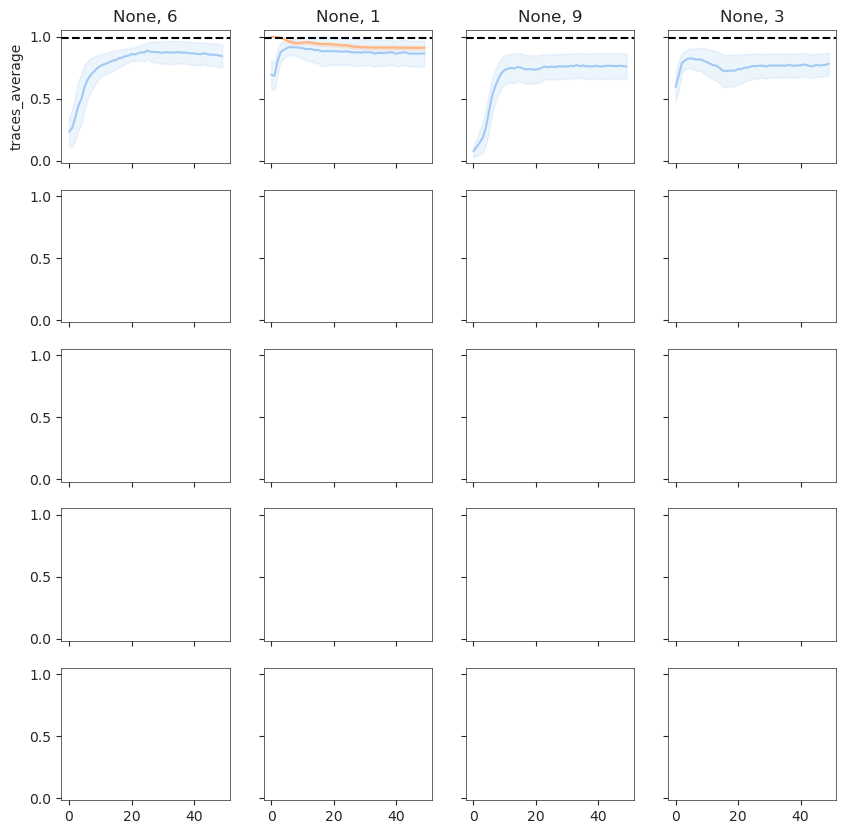

In [89]:

fig, axs = plt.subplots(len(reg_strings),len(scale_max), figsize=(10,10), sharex=True, sharey=True)
axs_dict = dict(zip(reg_strings, axs))
axs_dict = {k: dict(zip(scale_max, v)) for k, v in axs_dict.items()}
color_dict = dict(zip(quantum_preperation, colors))

for k1, v1 in axs_dict.items():
    for k2, v2 in v1.items():
        df_temp = df_exp[(df_exp['regularizer_string'] == k1) & (df_exp['scale_max'] == k2)]
        sns.lineplot(x='epoch', y='traces_average', hue='quantum_preparation_layer', data=df_temp, ax=v2, legend=False, hue_order=quantum_preperation)
        for qp in quantum_preperation:
            df_temp_qp = df_temp[df_temp['quantum_preparation_layer'] == qp]
            v2.fill_between(df_temp_qp['epoch'].values, 
                            df_temp_qp['traces_average'].values - df_temp_qp['traces_std'].values, 
                            df_temp_qp['traces_average'].values + df_temp_qp['traces_std'].values, color=color_dict[qp],
                            alpha=0.2)
        v2.axhline(y=0.99, color='k', linestyle='--')
        v2.set_title(f'{k1}, {k2}')

plt.plot([], [], color=color_dict[True], label='Quantum preparation layer')
plt.plot([], [], color=color_dict[False], label='No quantum preparation layer')
fig.legend()

plt.show()